# Sprint 12. Proyecto del módulo 2

## 1. Preparación de los datos

### 1.1 Abrir y examinar los datos

In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#Lectura de los archivos

gr_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gr_test = pd.read_csv('/datasets/gold_recovery_test.csv')
gr_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [2]:
# info(), head() y esas cosas

print("Datos de gr_train")
#print(gr_train.describe())
print(gr_train.info())
print()
print("Datos de gr_test")
#print(gr_test.describe())
print(gr_test.info())
print()
print("Datos de gr_train")
#print(gr_full.describe())
print(gr_full.info())

Datos de gr_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 

### 1.2 Comprobación del cálculo


In [3]:
#Calcular de nuevo la columna de Recovery y comparar con los resultados de la columna recovery 
def calc_recovery(c, f, t):
    recovery = ((c*(f-t))/ (f*(c-t))*100)
    recovery[recovery < 0] = np.nan
    recovery[recovery > 100] = np.nan
    return recovery

In [4]:
#Copia del dataset de train a uno nuevo para realizar los cálculos y no correr el riesgo de modificar el original
gr_train_copy = gr_train.copy()

#Cálculo de la nueva columna new_recovery
gr_train_copy['rougher.output.new_recovery'] = calc_recovery(
    gr_train_copy['rougher.output.concentrate_au'], gr_train_copy['rougher.input.feed_au'], gr_train_copy['rougher.output.tail_au']
)

#Comparación de los resultados
print(gr_train_copy[['rougher.output.recovery', 'rougher.output.new_recovery']].head(10))
print(gr_train_copy[['rougher.output.recovery', 'rougher.output.new_recovery']].sample(10))

   rougher.output.recovery  rougher.output.new_recovery
0                87.107763                    87.107763
1                86.843261                    86.843261
2                86.842308                    86.842308
3                87.226430                    87.226430
4                86.688794                    86.688794
5                88.156912                    88.156912
6                88.168065                    88.168065
7                87.668336                    87.668336
8                87.035862                    87.035862
9                87.650868                    87.650868
       rougher.output.recovery  rougher.output.new_recovery
15780                96.107181                    96.107181
4947                       NaN                          NaN
14955                94.499060                    94.499060
2612                 77.501617                    77.501617
14167                86.758982                    86.758982
4361                 79.

Los resultados son aparentemente iguales, a continuación el cálculo del EAM

In [5]:
from sklearn.metrics import mean_absolute_error

#Antes de calcular el EAM, se llenan con 0 los NaN para poder hacer el cálculo
gr_train_copy['rougher.output.recovery'].fillna(0, inplace = True)
gr_train_copy['rougher.output.new_recovery'].fillna(0, inplace = True)

#Cálculo del EAM
print(mean_absolute_error(gr_train_copy['rougher.output.recovery'], gr_train_copy['rougher.output.new_recovery']))

7.883623897364653e-15


El error es muy cercano a cero, esto puede ser por la cantidad de números decimales que se conservaron en el calculo que ya tenía el dataset comparado con todos los decimales que tienen los nuevos cálculos

### 1.3 Análisis de las características

In [6]:
#Hacer datasets los nombres de las columnas de los conjuntos train y test y restarlas
#Para ver cuales características sobran en train
#Las que sobran, quiere decir que no son necesarias para los modelos
columns_train = set(gr_train.columns)
columns_test = set(gr_test.columns)
print('Columnas en en test')
print(len(columns_test))

print('Columnas en en train')
print(len(columns_train))

diff_train = columns_train - columns_test
print('Columnas que están en train pero no en test')
print(len(diff_train))
print(list(diff_train))
print()

diff_test = columns_test -columns_train
print('Columnas que están en test pero no en train')
print(list(diff_test))

Columnas en en test
53
Columnas en en train
87
Columnas que están en train pero no en test
34
['final.output.tail_au', 'primary_cleaner.output.concentrate_pb', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.concentrate_sol', 'final.output.tail_sol', 'rougher.output.recovery', 'rougher.output.concentrate_au', 'secondary_cleaner.output.tail_sol', 'rougher.calculation.au_pb_ratio', 'secondary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'final.output.concentrate_sol', 'rougher.output.concentrate_pb', 'rougher.output.tail_ag', 'final.output.concentrate_ag', 'final.output.concentrate_au', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.tail_au', 'final.output.tail_pb', 'secondary_cleaner.output.tail_ag', 'final.output.recovery', 'final.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.tail_sol', 'rougher.

In [7]:
gr_train_without_test = gr_train.drop(gr_test.columns, axis = 1)
#print(gr_train_without_test.head(10))
print(gr_train_without_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                                16794 non-null  float64


No me queda claro que hacer con esta información

Entiendo que si no está en el dataset de test, es porque no es necesario para los modelos, pero el porque de ello no me queda claro

Agregaremos a gr_test las columnas de recovery para luego cuando evaluemos el modelo no tener que obtenerlas

In [8]:
print(gr_test.shape)
gr_test = gr_test.merge(gr_full[['date', 'rougher.output.recovery', 'final.output.recovery']], how = 'left', on = 'date')
print(gr_test.shape)

(5856, 53)
(5856, 55)


### 1.4 Preprocesamiento de datos

In [9]:
#Revisar y corregir los nulos, hacer las valoraciones necesarias
gr_full['date'] = pd.to_datetime(gr_full['date'])
gr_train['date'] = pd.to_datetime(gr_train['date'])
gr_test['date'] = pd.to_datetime(gr_test['date'])

#print(gr_full.head())
#print(gr_train.head())
#print(gr_test.head())

In [10]:
#Eliminaremos de train las columnas que no están en test y después trataremos los valores nulos
gr_train = gr_train[gr_test.columns]
print(gr_train.info())
print(gr_train.shape)
print(gr_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        16860 non-null  datetime64[ns]
 1   primary_cleaner.input.sulfate               15553 non-null  float64       
 2   primary_cleaner.input.depressant            15598 non-null  float64       
 3   primary_cleaner.input.feed_size             16860 non-null  float64       
 4   primary_cleaner.input.xanthate              15875 non-null  float64       
 5   primary_cleaner.state.floatbank8_a_air      16820 non-null  float64       
 6   primary_cleaner.state.floatbank8_a_level    16827 non-null  float64       
 7   primary_cleaner.state.floatbank8_b_air      16820 non-null  float64       
 8   primary_cleaner.state.floatbank8_b_level    16833 non-null  float64       
 9   primar

In [11]:
print(gr_train.isna().sum())
print()
print(gr_test.isna().sum())

date                                             0
primary_cleaner.input.sulfate                 1307
primary_cleaner.input.depressant              1262
primary_cleaner.input.feed_size                  0
primary_cleaner.input.xanthate                 985
primary_cleaner.state.floatbank8_a_air          40
primary_cleaner.state.floatbank8_a_level        33
primary_cleaner.state.floatbank8_b_air          40
primary_cleaner.state.floatbank8_b_level        27
primary_cleaner.state.floatbank8_c_air          38
primary_cleaner.state.floatbank8_c_level        27
primary_cleaner.state.floatbank8_d_air          39
primary_cleaner.state.floatbank8_d_level        27
rougher.input.feed_ag                           82
rougher.input.feed_pb                          228
rougher.input.feed_rate                        513
rougher.input.feed_size                        417
rougher.input.feed_sol                         292
rougher.input.feed_au                           83
rougher.input.floatbank10_sulfa

**Por la naturaleza de los datos y debido a que de acuerdo a la teoría, los datos que tengan NaN pueden ser datos que no estaban disponibles al momento de la lectura, creo que lo mejor es rellenarlos con la media de la columna, ya que si los rellenamos con ceros esto puede modificar los resultados finales de los modelos y hacer que estos estén sesgados.**

In [12]:
gr_train.fillna(gr_train.mean(), inplace=True)
gr_test.fillna(gr_test.mean(), inplace=True)
print(gr_train.isna().sum())
print()
print(gr_test.isna().sum())

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

## 2. Análisis de los datos

In [13]:
import seaborn as sns
#Función para graficar
def conc_graph(elem):
    cols = [
        'rougher.input.feed_'+elem,
        'rougher.output.concentrate_'+elem,
        'primary_cleaner.output.concentrate_'+elem,
        'final.output.concentrate_'+elem
    ]
    sns.displot(
        gr_full[cols],
        legend=True,
        kde=True,
        height = 8,
        aspect = 1.5
    )
    plt.title('Concentración de ' + str(elem) + ' en las diferentes etapas')
    plt.figure(figsize = (14,6))
    plt.xticks(rotation = 0)
    sns.boxplot(data = gr_full[cols])

### 2.1 Cambios de la concentración de metales

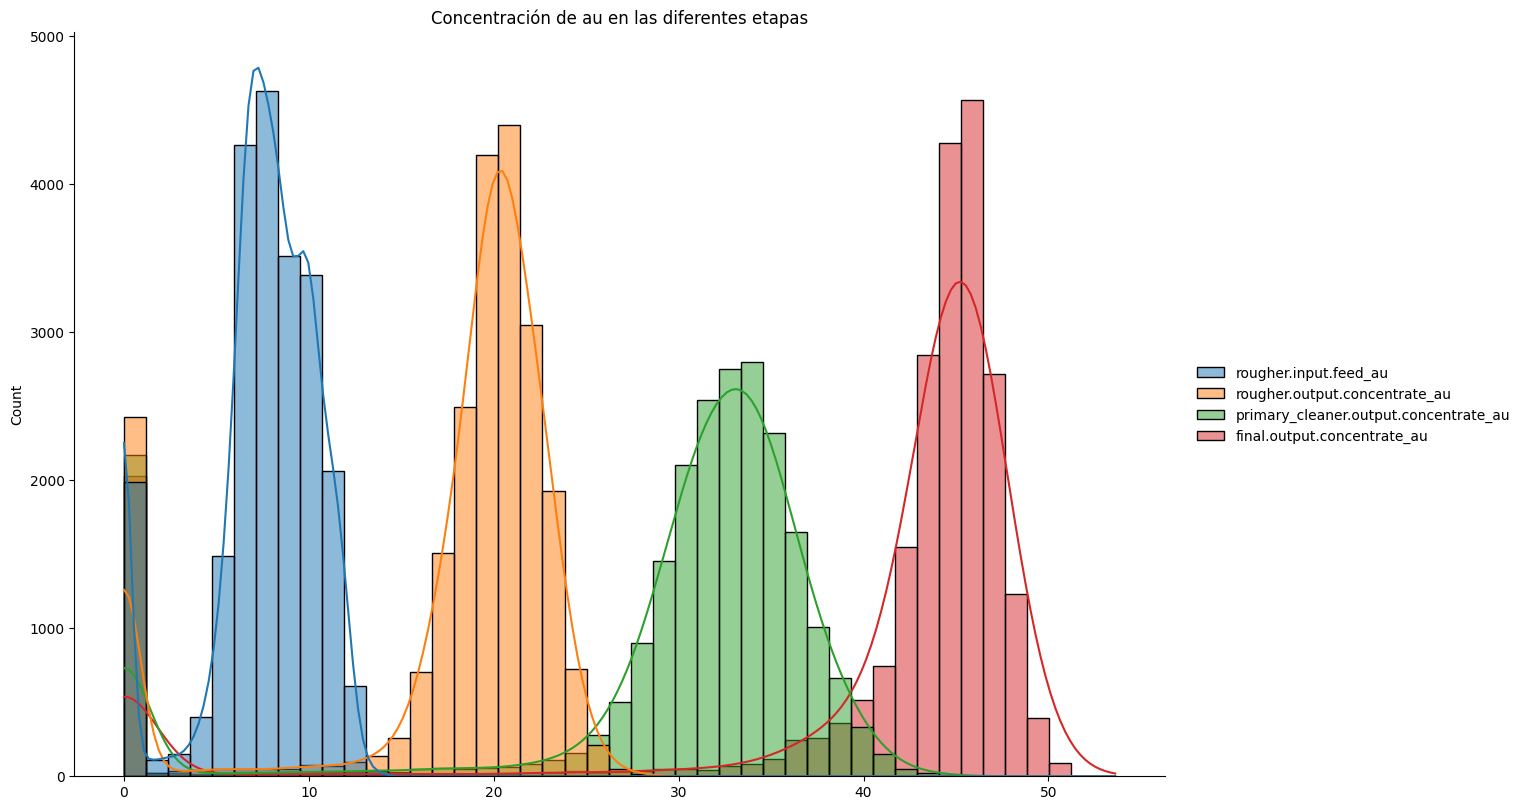

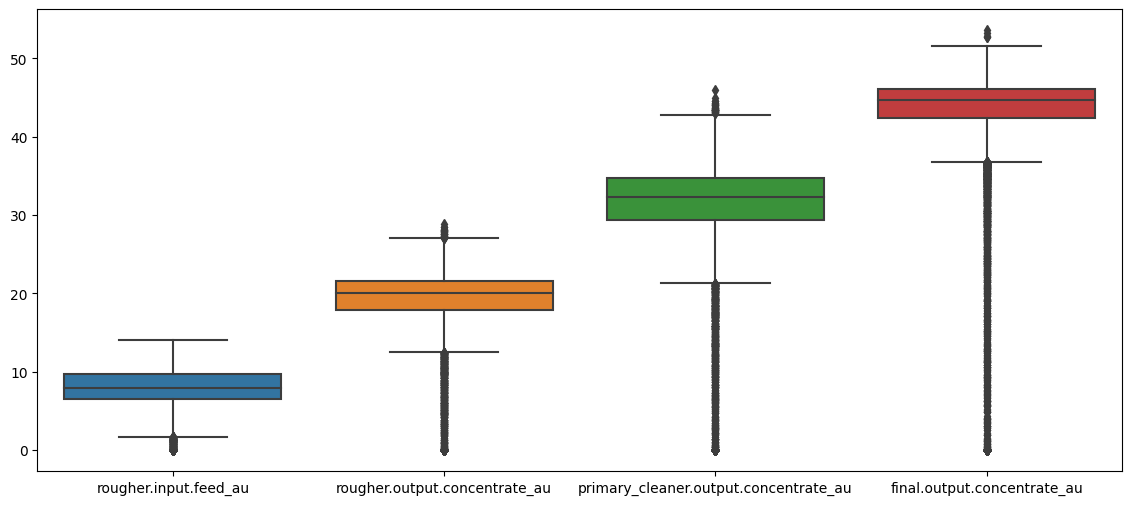

In [14]:
#Concentración del Oro
conc_graph('au')

Se puede observar que la concentración de oro aumenta en cada una de las etapas y que en la etapa del primary_cleaner la distribución es un poco más dispersa, pero esta dispersión disminuye en la última etapa.

Se encuentran muchos outilers en cada etapa y parece que aumentan en cada una

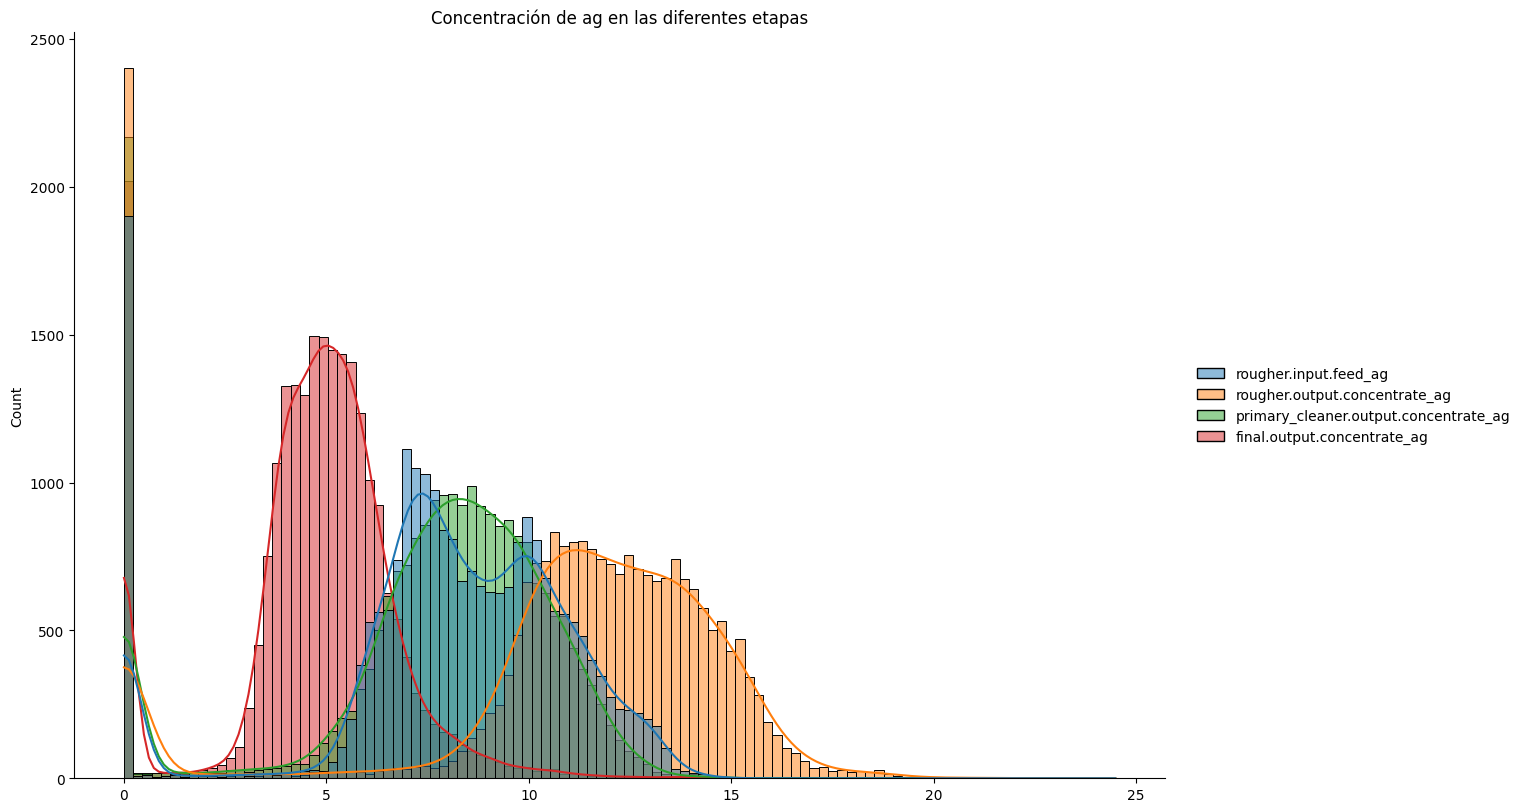

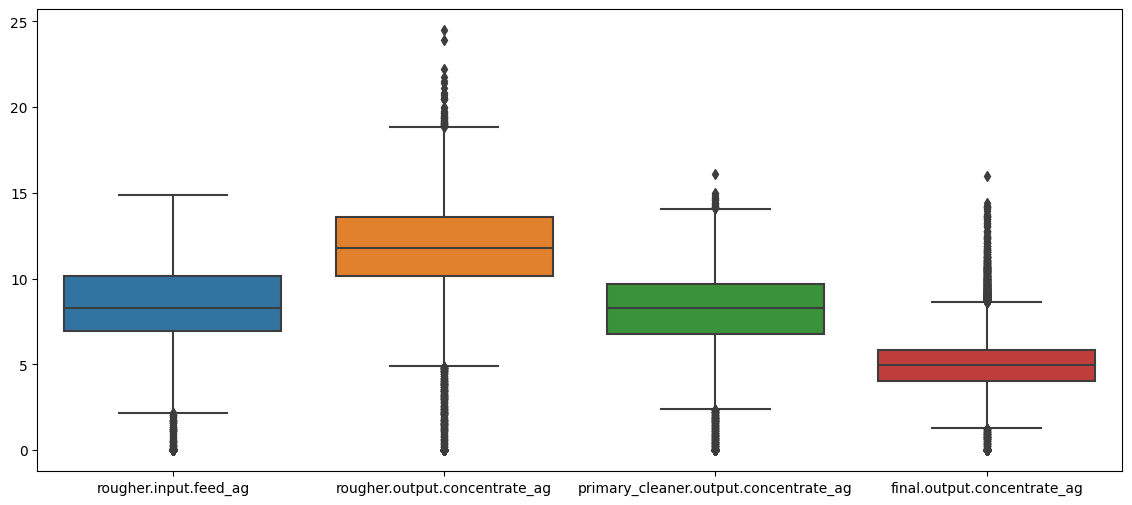

In [15]:
#Concentración de la Plata
conc_graph('ag')

La concentración de plata aumenta de la primera a la segunda etapa pero a partir de la segunda en adelante, esta disminuye, así como también disminuye la dispersión


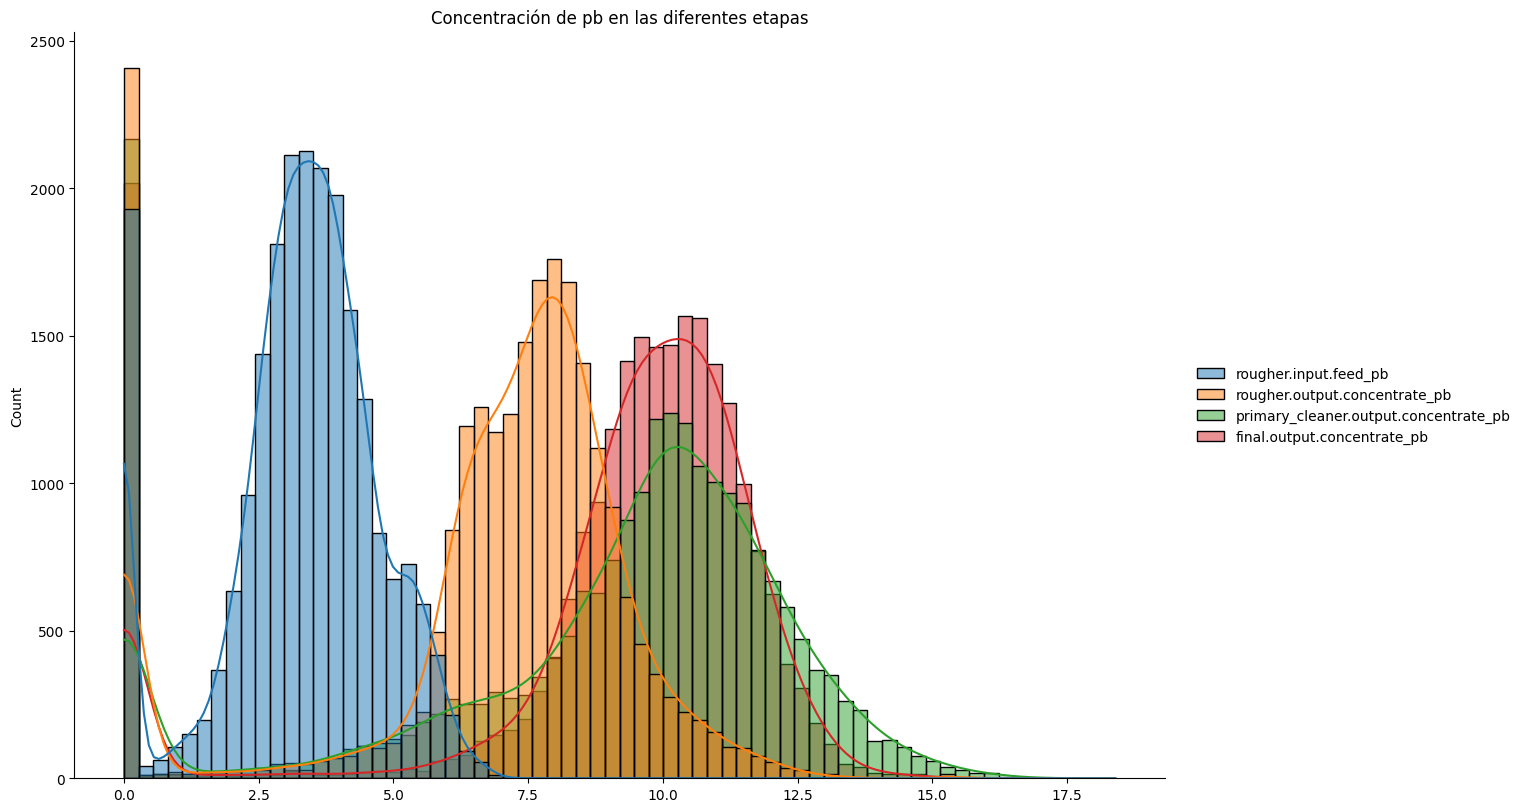

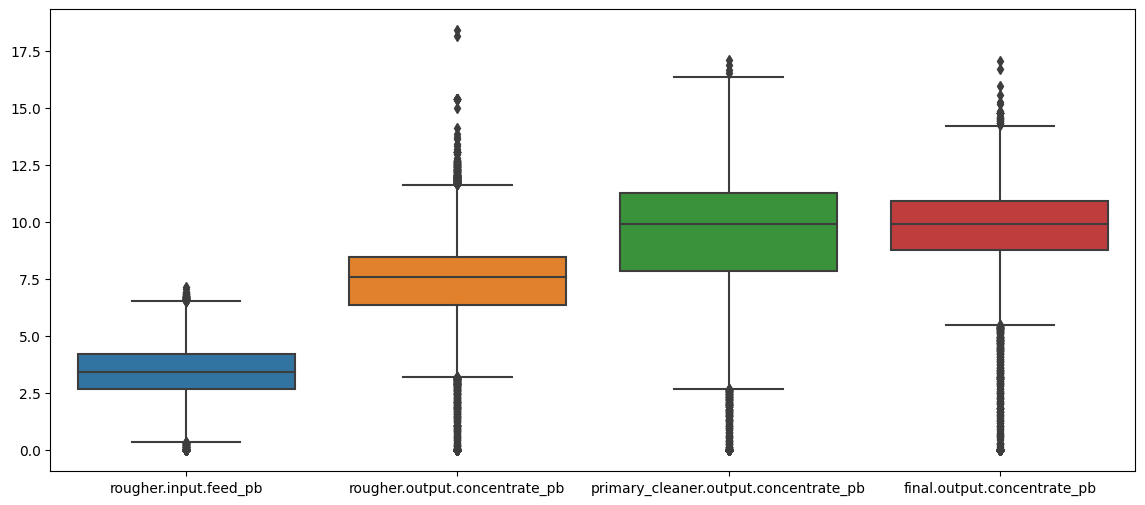

In [16]:
#Concentración del Plomo
conc_graph('pb')

La concentración de plomo aumenta con cada una de las etapas, exceptuando de la 3ra a la 4ta etapa, teniendo una concentración similar, aunque lo que si disminuye es la dispersión de los datos.

### 2.2 Comparación de las distribuciones del tamaño de partículas

In [17]:
#Se utilizará el test estadístico Kolmogorov-Smirnov para comparar las muestras
from scipy.stats import ks_2samp

stat, p_value = ks_2samp(
    gr_train['rougher.input.feed_size'],
    gr_test['rougher.input.feed_size']
)
print(f'Estadístico KS: {stat:.4f}')
print(f'Valor p: {p_value:.4f}')

alfa = 0.05
if p_value > alfa:
    print('No hay evidencia significativa de que las distribuciones sean diferentes')
else:
    print('Las distribuciones son significativamente diferentes')

Estadístico KS: 0.1951
Valor p: 0.0000
Las distribuciones son significativamente diferentes


Parece ser que las muestras si son significativamente diferentes

Se realizará la visualización de ambas en histograma para ver si existen muchos outliers que hagan que las muestras cambien mucho entre sí


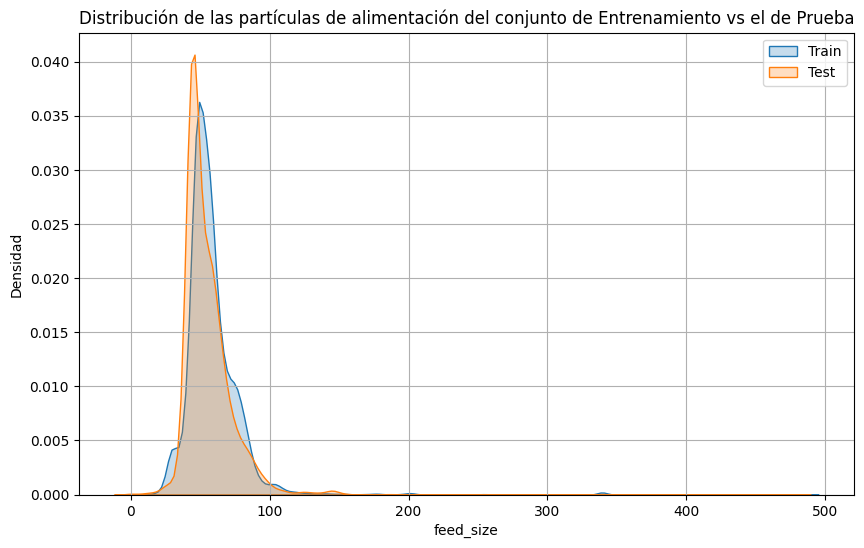

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(gr_train['rougher.input.feed_size'], label = 'Train', fill=True)
sns.kdeplot(gr_test['rougher.input.feed_size'], label = 'Test', fill=True)
plt.title('Distribución de las partículas de alimentación del conjunto de Entrenamiento vs el de Prueba')
plt.xlabel('feed_size')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

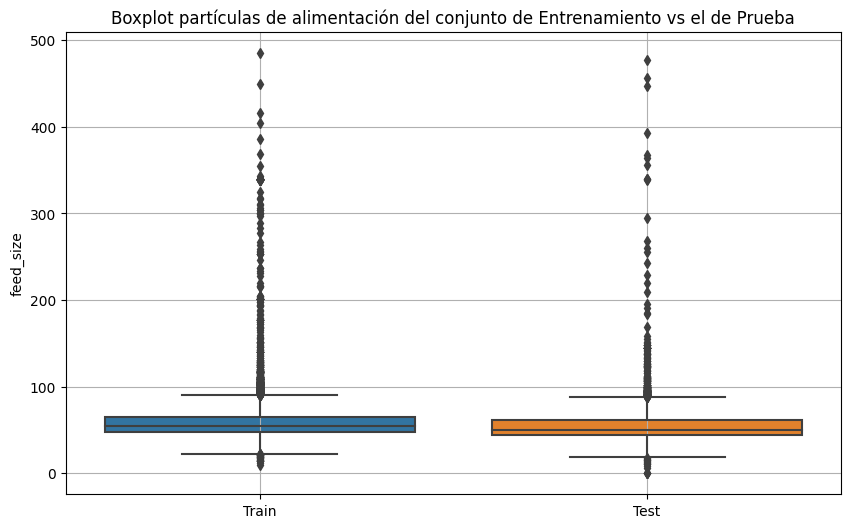

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = [gr_train['rougher.input.feed_size'], gr_test['rougher.input.feed_size']])
plt.xticks([0, 1], ['Train', 'Test'])
plt.ylabel('feed_size')
plt.title('Boxplot partículas de alimentación del conjunto de Entrenamiento vs el de Prueba')
plt.grid(True)
plt.show()

Se observa una gran cantidad de Outiliers, recortaré algunos y volveré a correr el test KS

In [20]:
# Percentiles de Train
q1_train, q99_train = gr_train['rougher.input.feed_size'].quantile([0.01, 0.99])
gr_train_trimmed = gr_train[(gr_train['rougher.input.feed_size'] >= q1_train) &
                            (gr_train['rougher.input.feed_size'] <= q99_train)]

# Percentiles de Test
q1_test, q99_test = gr_test['rougher.input.feed_size'].quantile([0.01, 0.99])
gr_test_trimmed = gr_test[(gr_test['rougher.input.feed_size'] >= q1_test) &
                          (gr_test['rougher.input.feed_size'] <= q99_test)]


stat_trimmed, p_value_trimmed = ks_2samp(
    gr_train_trimmed['rougher.input.feed_size'],
    gr_test_trimmed['rougher.input.feed_size']
)

print(f'Estadístico KS (tras recorte): {stat_trimmed:.4f}')
print(f'Valor p (tras recorte): {p_value_trimmed:.4f}')

if p_value_trimmed > 0.05:
    print("Las distribuciones ya no son significativamente diferentes.")
else:
    print("Aún hay diferencia significativa.")

Estadístico KS (tras recorte): 0.1991
Valor p (tras recorte): 0.0000
Aún hay diferencia significativa.


Después de realizar varias pruebas (con los percentiles desde 0.01 hasta 0.05 y desde 0.99 a 0.95), esto no funcionó pues seguía existiendo diferencia significativa

Ahora realizaré una Estandarización con Standard Scaler

Estadístico KS (escalado): 0.1951
Valor p (escalado): 0.0000
Aún hay diferencia significativa.


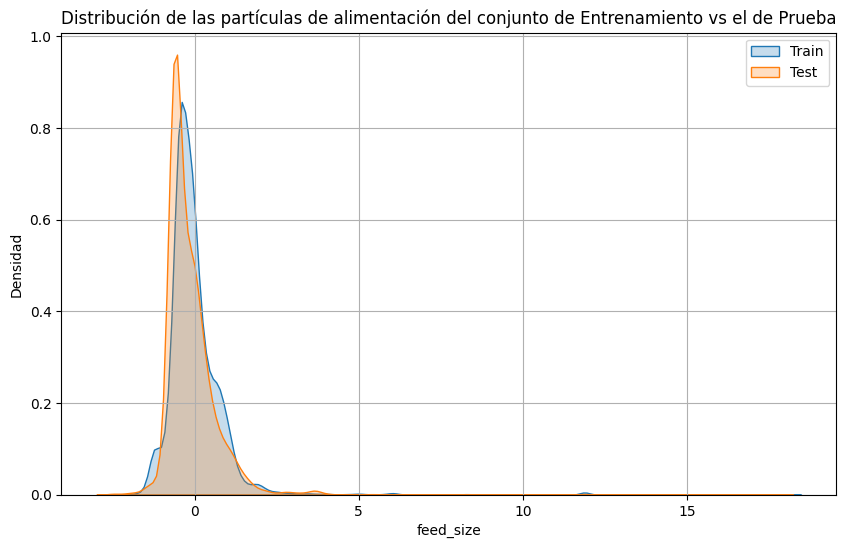

In [21]:
from sklearn.preprocessing import StandardScaler

scaler_train = StandardScaler()

gr_train_scaled = gr_train.copy()
gr_test_scaled = gr_test.copy()

# Ajustar y transformar Train
scaler_train.fit(gr_train_scaled[['rougher.input.feed_size']])
gr_train_scaled['rougher.input.feed_size'] = scaler_train.transform(gr_train_scaled[['rougher.input.feed_size']])

# Transformar Test
gr_test_scaled['rougher.input.feed_size'] = scaler_train.transform(gr_test_scaled[['rougher.input.feed_size']])

stat_scaled, p_value_scaled = ks_2samp(
    gr_train_scaled['rougher.input.feed_size'],
    gr_test_scaled['rougher.input.feed_size']
)

print(f'Estadístico KS (escalado): {stat_scaled:.4f}')
print(f'Valor p (escalado): {p_value_scaled:.4f}')

if p_value_scaled > 0.05:
    print("Las distribuciones ya no son significativamente diferentes.")
else:
    print("Aún hay diferencia significativa.")

plt.figure(figsize=(10, 6))
sns.kdeplot(gr_train_scaled['rougher.input.feed_size'], label = 'Train', fill=True)
sns.kdeplot(gr_test_scaled['rougher.input.feed_size'], label = 'Test', fill=True)
plt.title('Distribución de las partículas de alimentación del conjunto de Entrenamiento vs el de Prueba')
plt.xlabel('feed_size')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

No estoy seguro si hice algo mal con el scaler, pero no cambió nada los resultados del estadístico al compararlos con la primera vez que se hizo la prueba estadística

Por ahora lo dejaré así y continuaré

### 2.3 Concentraciones totales en las diferentes etapas

In [22]:
gr_full['raw'] = gr_full[
    ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']
].sum(axis=1)
gr_full['draft_concentrate'] = gr_full[
    ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']
].sum(axis=1)
gr_full['conc_after_filter'] = gr_full[
    ['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb']
].sum(axis=1)
gr_full['final_concentrate'] = gr_full[
    ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']
].sum(axis=1)
gr_full[['raw', 'draft_concentrate', 'conc_after_filter', 'final_concentrate']].describe()

,raw,draft_concentrate,conc_after_filter,final_concentrate
count,22716.000000,22716.000000,22716.000000,22716.000000
mean,18.833952,35.500849,45.489901,53.673032
std,7.418530,13.401008,16.248774,17.975586
min,0.000000,0.000000,0.000000,0.000000
25%,16.447446,37.326591,48.745632,58.684224
50%,19.560398,39.961497,51.517962,60.073814
75%,23.572584,42.181417,53.156499,60.990543
max,35.071987,55.568687,60.269003,65.575259


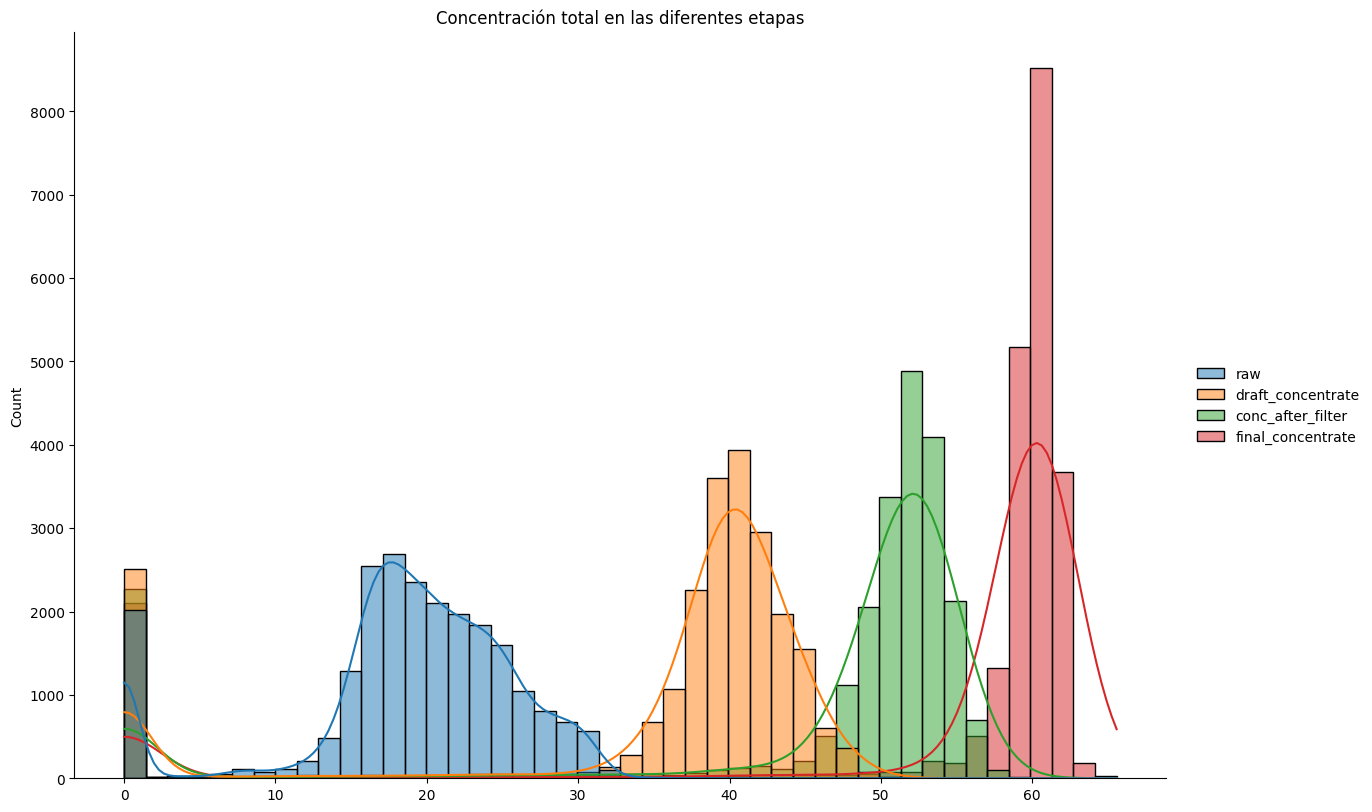

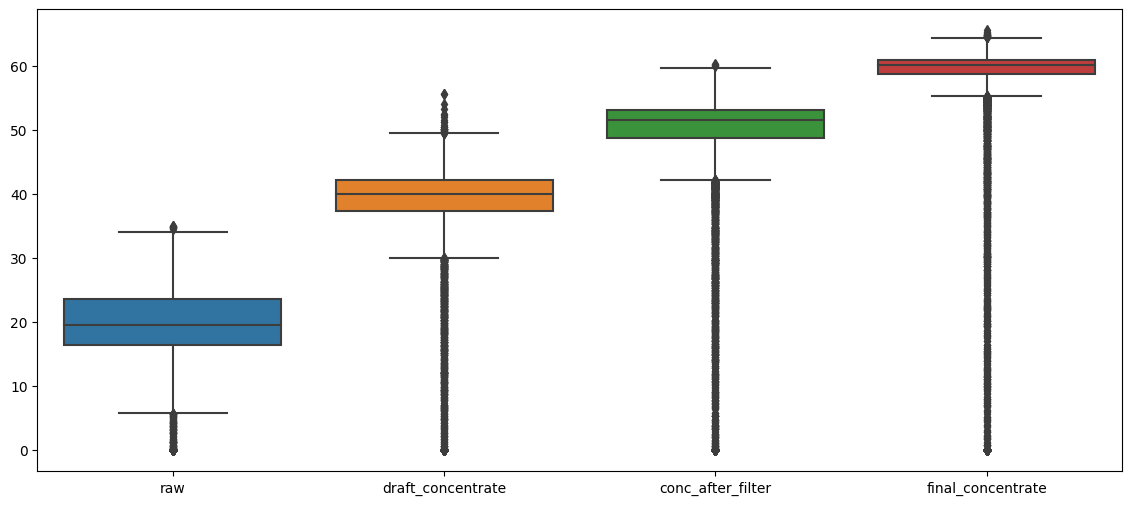

In [23]:
new_cols = ['raw', 'draft_concentrate', 'conc_after_filter', 'final_concentrate']
sns.displot(gr_full[new_cols],
            legend=True,
            kde=True,
            height=8,
            aspect=1.5
           )
plt.title('Concentración total en las diferentes etapas')
plt.figure(figsize=(14, 6))
plt.xticks(rotation=0)
sns.boxplot(data = gr_full[new_cols])
plt.show()

Hay algunos valores outliers en 0. Puede ser que estén relacionados con materiales no metálicos o puede ser de los moemntos en los que los datos no estaban disponibles cuando se realizó la lectura. Sin embargo, pueden afectar el rendimiento de nuestros modelos, por lo que es mejor eliminarlos.

In [24]:
for col in new_cols:
    print(col, 'ceros: ', len(gr_full[gr_full[col] == 0]))
    print(col, 'negativos: ', len(gr_full[gr_full[col] < 0]))

raw ceros:  1626
raw negativos:  0
draft_concentrate ceros:  2051
draft_concentrate negativos:  0
conc_after_filter ceros:  1724
conc_after_filter negativos:  0
final_concentrate ceros:  1699
final_concentrate negativos:  0


In [25]:
full_clean = gr_full[
    (gr_full['raw'] != 0) & 
    (gr_full['draft_concentrate'] != 0) & 
    (gr_full['conc_after_filter'] != 0) & 
    (gr_full['final_concentrate'] != 0)
]

full_clean.shape
#print(full_clean.head())
print(full_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20238 entries, 0 to 22715
Data columns (total 91 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                20238 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         20235 non-null  float64       
 2   final.output.concentrate_pb                         20237 non-null  float64       
 3   final.output.concentrate_sol                        19963 non-null  float64       
 4   final.output.concentrate_au                         20238 non-null  float64       
 5   final.output.recovery                               20067 non-null  float64       
 6   final.output.tail_ag                                20237 non-null  float64       
 7   final.output.tail_pb                                20120 non-null  float64       
 8   final.

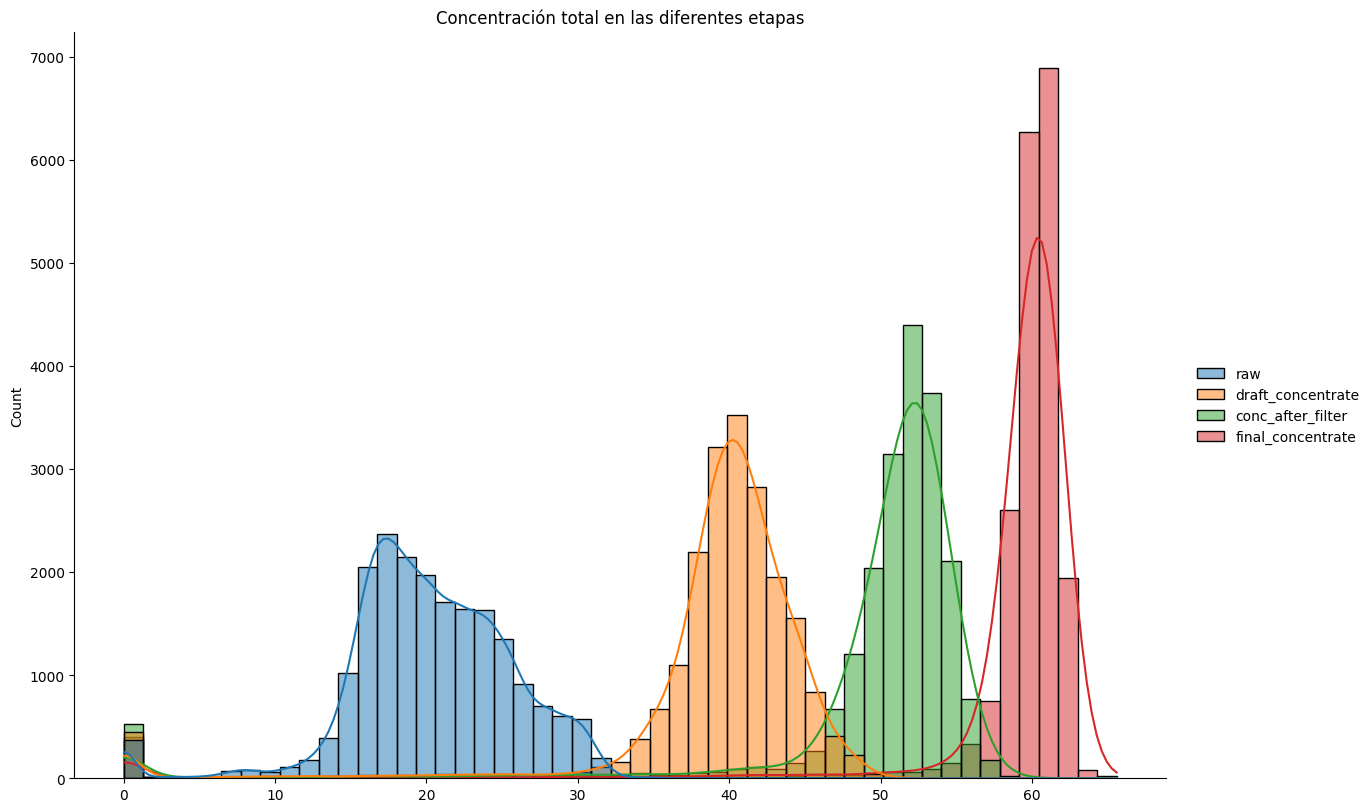

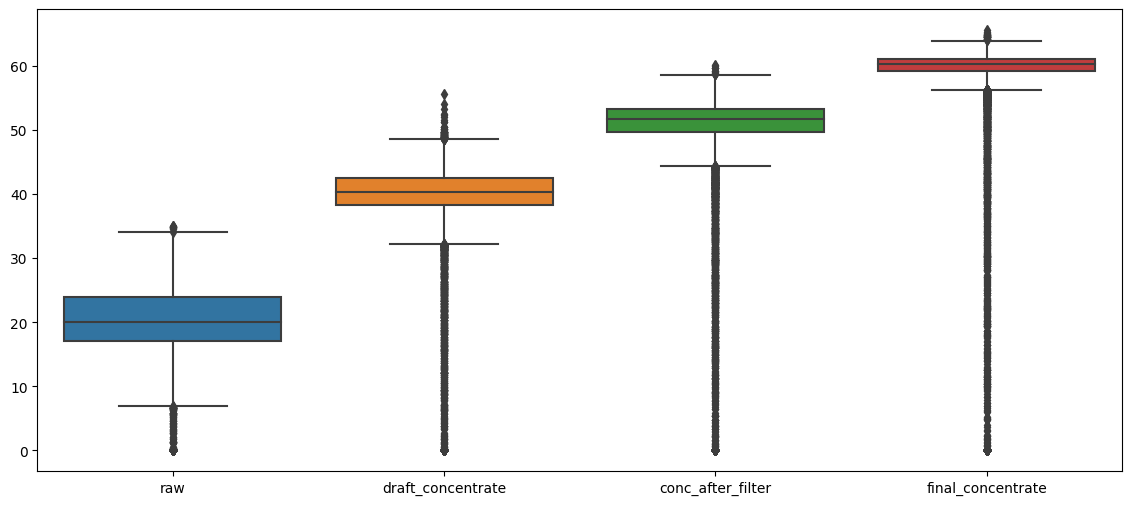

In [26]:
sns.displot(full_clean[new_cols],
            legend=True,
            kde=True,
            height=8,
            aspect=1.5
           )
plt.title('Concentración total en las diferentes etapas')
plt.figure(figsize=(14, 6))
plt.xticks(rotation=0)
sns.boxplot(data = full_clean[new_cols])
plt.show()

Se observa que aún hay algunos outliers entre 0 y 1, relizaré lo mismo que con los ceros para no afectar el modelo

In [27]:
for col in new_cols:
    print(col, 'menores que 1: ', len(full_clean[full_clean[col] < 1]))

raw menores que 1:  368
draft_concentrate menores que 1:  445
conc_after_filter menores que 1:  527
final_concentrate menores que 1:  396


In [28]:
full_clean = full_clean[
    (full_clean['raw'] > 1) & 
    (full_clean['draft_concentrate'] > 1) & 
    (full_clean['conc_after_filter'] > 1) & 
    (full_clean['final_concentrate'] > 1)
]

full_clean.shape
#print(full_clean.head())
#print(full_clean.info())

(19575, 91)

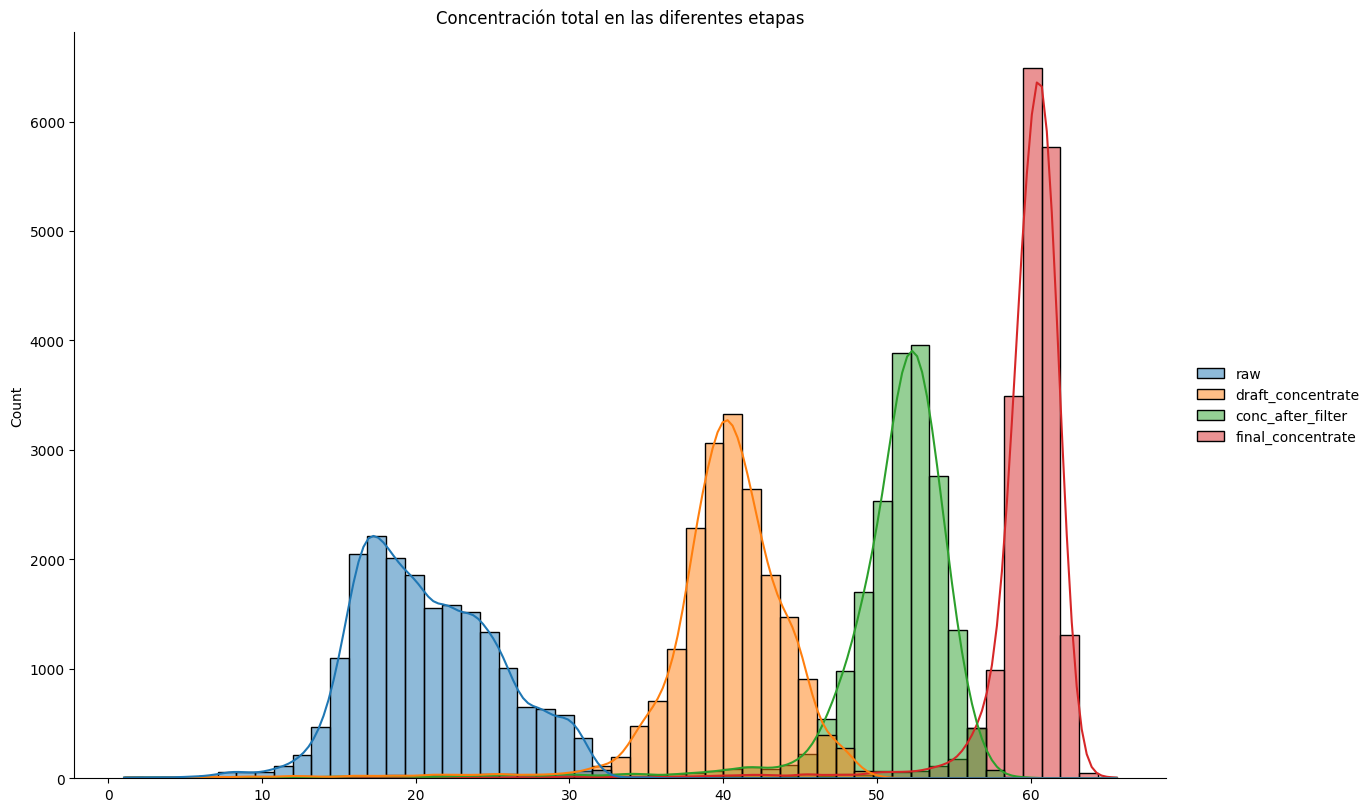

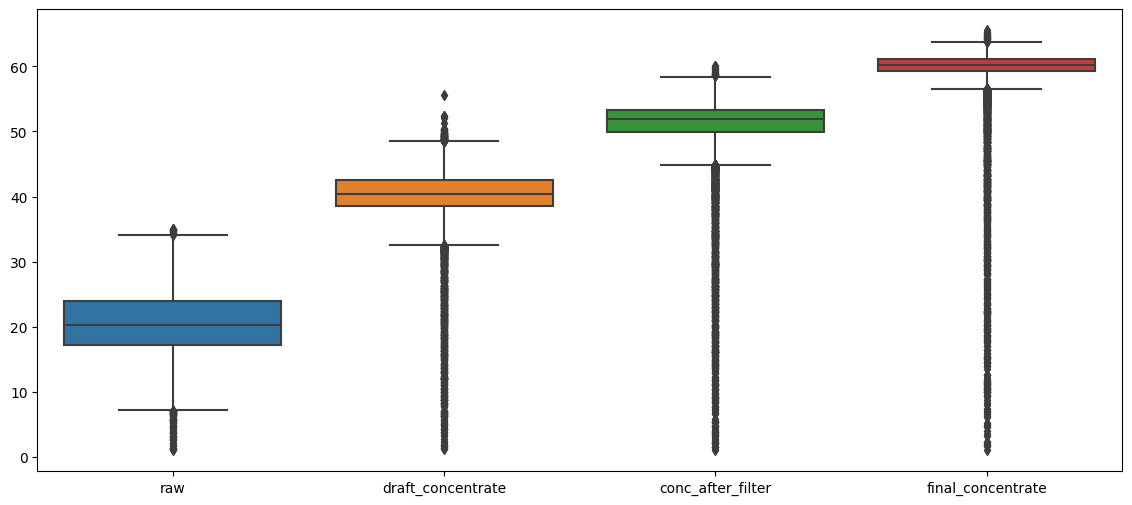

In [29]:
sns.displot(full_clean[new_cols],
            legend=True,
            kde=True,
            height=8,
            aspect=1.5
           )
plt.title('Concentración total en las diferentes etapas')
plt.figure(figsize=(14, 6))
plt.xticks(rotation=0)
sns.boxplot(data = full_clean[new_cols])
plt.show()

In [30]:
print(full_clean[new_cols].describe())

                raw  draft_concentrate  conc_after_filter  final_concentrate
count  19575.000000       19575.000000       19575.000000       19575.000000
mean      20.733002          40.035789          50.757705          59.335867
std        4.637593           4.732761           5.546544           4.992355
min        1.130990           1.137053           1.037408           1.084495
25%       17.250835          38.494072          49.961182          59.235753
50%       20.219502          40.398724          51.853851          60.268208
75%       23.988143          42.493014          53.318204          61.066597
max       35.071987          55.568687          60.106566          65.575259


In [31]:
#Train set

print(gr_train.shape)
train_new = gr_train[gr_train['date'].isin(full_clean['date'])]
train_new = train_new.dropna()
train_new.reset_index(drop=True, inplace=True)
print(train_new.shape)
#print(train_new.info())


(16860, 55)
(14335, 55)


In [32]:
#Test set
print(gr_test.shape)
test_new = gr_test[gr_test['date'].isin(full_clean['date'])]
test_new = test_new.dropna()
test_new.reset_index(drop=True, inplace=True)
print(test_new.shape)
#print(test_new.info())


(5856, 55)
(5240, 55)


Se crearon los nuevos dataset para train y test, utilizando los fila que quedaban en full_clean, dataset del cual ya se habían eliminado los outliers.

## 3. Construcción del modelo

### 3.1 Función para el cálculo de sMAPE

In [33]:
def sMAPE(rougher_sMAPE, final_sMAPE):
    result = (0.25 * rougher_sMAPE) + (0.75 * final_sMAPE)
    return result

### 3.2 Diferentes modelos

In [34]:
#Creación de los target para la validación cruzada
#train set

target_rougher_train = train_new['rougher.output.recovery']
target_final_train = train_new['final.output.recovery']
features_train = train_new.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

#test set
target_rougher_test = test_new['rougher.output.recovery']
target_final_test = test_new['final.output.recovery']
features_test = test_new.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

In [35]:
print(features_train.shape, features_test.shape)

(14335, 52) (5240, 52)


In [36]:
numeric = features_train.columns
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

#print(features_train.head())

In [37]:
models = [
    DecisionTreeRegressor(random_state = 12345),
    RandomForestRegressor(random_state = 12345),
    LinearRegression()
]

In [38]:
#Función para sMAPE score
def smape_scorer(target, predictions):
    smape = ((1 / len(target)) * (abs(target - predictions) / ((abs(target) + abs(predictions)) / 2))).sum() * 100
    return smape

In [39]:
#Función para calificar los modelos

def fit_check(model, params, df_train, df_target):
    my_scorer = make_scorer(smape_scorer, greater_is_better=False)
    clf = GridSearchCV(model, params, scoring=my_scorer, cv=5)
    clf.fit(df_train, df_target)
    
    return clf.best_estimator_, clf.best_score_

In [40]:

results_cross_val = []

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

for model in models:
    scorer = make_scorer(smape_scorer, greater_is_better=False) 
    cross_val_score_rougher = cross_val_score(model, features_train, target_rougher_train, cv=5, scoring=scorer).mean()
    cross_val_score_final = cross_val_score(model, features_train, target_final_train, cv=5, scoring=scorer).mean()

    results_cross_val.append({
        'model name': model.__class__.__name__, 
        'cross_val_score_rougher': cross_val_score_rougher, 
        'cross_val_score_final': cross_val_score_final
    }) 
              
ress = pd.DataFrame(results_cross_val)
print(ress)


              model name  cross_val_score_rougher  cross_val_score_final
0  DecisionTreeRegressor                -9.038660             -15.912105
1  RandomForestRegressor                -6.653643              -9.923040
2       LinearRegression                -7.237876             -11.324803


El RandomForestRegressor es el modelo que nos arroja los mejores resultados, por lo tanto es que utilizaremos en adelante.

Ahora toca revisar que hiperparámetros son los mejores para este modelo


In [41]:
results = []

for depth in range(1,8):
    
    for estimator in range(10, 31, 5):
        
        model = RandomForestRegressor(random_state=12345, n_estimators=estimator, max_depth=depth)
        
        scorer = make_scorer(smape_scorer, greater_is_better=False) 
    
        cross_val_score_rougher = cross_val_score(model, features_train, target_rougher_train, cv=5, scoring=scorer).mean()
        cross_val_score_final = cross_val_score(model, features_train, target_final_train, cv=5, scoring=scorer).mean()

        smape_final_result = sMAPE(cross_val_score_rougher, cross_val_score_final)

        results.append({
            'model name': model.__class__.__name__, 
            'Hyperparameters': {'random_state': 12345,'n_estimators': estimator, 'max_depth':depth}, 
            'smape_final_result': smape_final_result
        })

pd.DataFrame(results).style.highlight_max(color = 'lightgreen', axis = 0)

,model name,Hyperparameters,smape_final_result
0,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 10, 'max_depth': 1}",-9.184365
1,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 15, 'max_depth': 1}",-9.174796
2,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 20, 'max_depth': 1}",-9.176500
3,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 25, 'max_depth': 1}",-9.158833
4,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 30, 'max_depth': 1}",-9.150218
5,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 10, 'max_depth': 2}",-8.745150
6,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 15, 'max_depth': 2}",-8.739267
7,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 20, 'max_depth': 2}",-8.741114
8,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 25, 'max_depth': 2}",-8.715948
9,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 30, 'max_depth': 2}",-8.714454


Después de hacer el corrido, el resultado que arrojó como los mejores hiperparámetros son n-estimators = 30 y depth = 4

Ahora realizaré el entrenamiento del modelo final y se probará con el conjunto de prueba

In [43]:
modelo_final = RandomForestRegressor(random_state = 12345, n_estimators = 30, max_depth = 4)

modelo_final.fit(features_train, target_rougher_train)
predictions_rougher = modelo_final.predict(features_test)

modelo_final.fit(features_train, target_final_train)
predictions_final = modelo_final.predict(features_test)

smape_rougher = smape_scorer(target_rougher_test, predictions_rougher)
smape_final = smape_scorer(target_final_test, predictions_final)

smape_total = sMAPE(smape_rougher, smape_final)

print('sMAPE: ', smape_total)

sMAPE:  7.523796579465078


## Conclusión

Se eligió un modelo con el symmetric Mean Absolute Percentage Error (sMAPE) del 7.5% que fue el que dió un mejor resultado de todos los probados para la obtención de minerales.
